In [2]:
!pip install mysql-connector-python
!pip install sqlalchemy
!pip install pandas
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
from sqlalchemy import create_engine

username = "root"        
password = "amar123"  
host = "localhost"       
database = "job_market" 

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

query = "SELECT * FROM job_market LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)


                                           job_title  \
0                            Robotics / STEM Trainer   
1                         HTML Developers - Freshers   
2                         Java Developers - Freshers   
3  Teachers - Pre-Primary and Primary (English, M...   
4                                    College Student   

                          Location                            Salary  \
0           Indore, Madhya Pradesh  â‚¹1,80,000 - â‚¹3,60,000 a year   
1  Banaswadi, Bengaluru, Karnataka                     Not specified   
2  Banaswadi, Bengaluru, Karnataka                     Not specified   
3       Pulivendla, Andhra Pradesh     â‚¹20,000 - â‚¹30,000 a month   
4                           Remote     â‚¹15,000 - â‚¹20,000 a month   

   monthly_salary   Locality        City           State  
0        270000.0                 Indore  Madhya Pradesh  
1             NaN  Banaswadi   Bengaluru       Karnataka  
2             NaN  Banaswadi   Bengaluru       Karnat

In [4]:
print(df.head())   
print(df.tail())  

                                           job_title  \
0                            Robotics / STEM Trainer   
1                         HTML Developers - Freshers   
2                         Java Developers - Freshers   
3  Teachers - Pre-Primary and Primary (English, M...   
4                                    College Student   

                          Location                            Salary  \
0           Indore, Madhya Pradesh  â‚¹1,80,000 - â‚¹3,60,000 a year   
1  Banaswadi, Bengaluru, Karnataka                     Not specified   
2  Banaswadi, Bengaluru, Karnataka                     Not specified   
3       Pulivendla, Andhra Pradesh     â‚¹20,000 - â‚¹30,000 a month   
4                           Remote     â‚¹15,000 - â‚¹20,000 a month   

   monthly_salary   Locality        City           State  
0        270000.0                 Indore  Madhya Pradesh  
1             NaN  Banaswadi   Bengaluru       Karnataka  
2             NaN  Banaswadi   Bengaluru       Karnat

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title       5 non-null      object 
 1   Location        5 non-null      object 
 2   Salary          5 non-null      object 
 3   monthly_salary  3 non-null      float64
 4   Locality        5 non-null      object 
 5   City            5 non-null      object 
 6   State           5 non-null      object 
dtypes: float64(1), object(6)
memory usage: 412.0+ bytes
None


### Salary Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


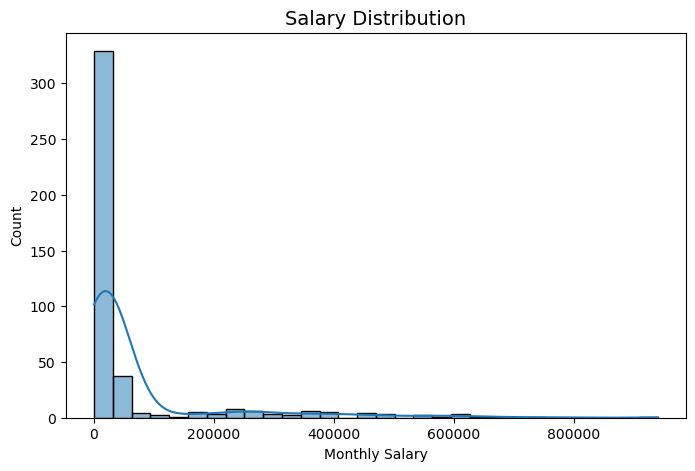

In [6]:
query = "SELECT monthly_salary FROM job_market WHERE monthly_salary IS NOT NULL;"
salary_df = pd.read_sql(query, engine)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(salary_df['monthly_salary'], bins=30, kde=True)
plt.title("Salary Distribution", fontsize=14)
plt.xlabel("Monthly Salary")
plt.ylabel("Count")
plt.show()


### Average Salary by Job Title

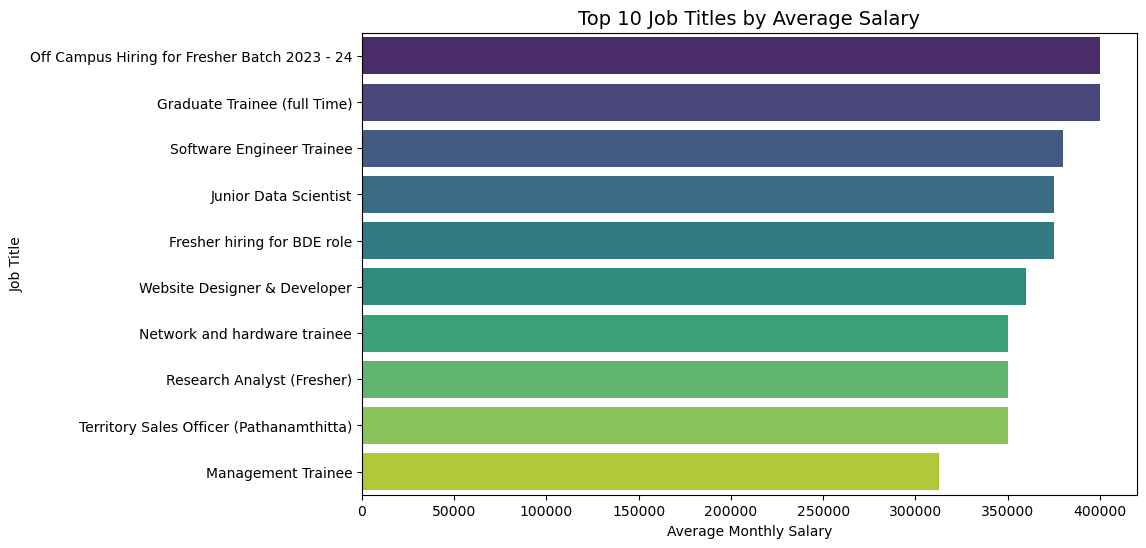

In [15]:
query = """
SELECT job_title, AVG(monthly_salary) AS avg_salary
FROM job_market
WHERE monthly_salary IS NOT NULL
GROUP BY job_title
ORDER BY avg_salary DESC
LIMIT 10
offset 15;
"""
job_salary_df = pd.read_sql(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(x="avg_salary", y="job_title", data=job_salary_df, palette="viridis")
plt.title("Top 10 Job Titles by Average Salary", fontsize=14)
plt.xlabel("Average Monthly Salary")
plt.ylabel("Job Title")
plt.show()


### Job Openings by Location

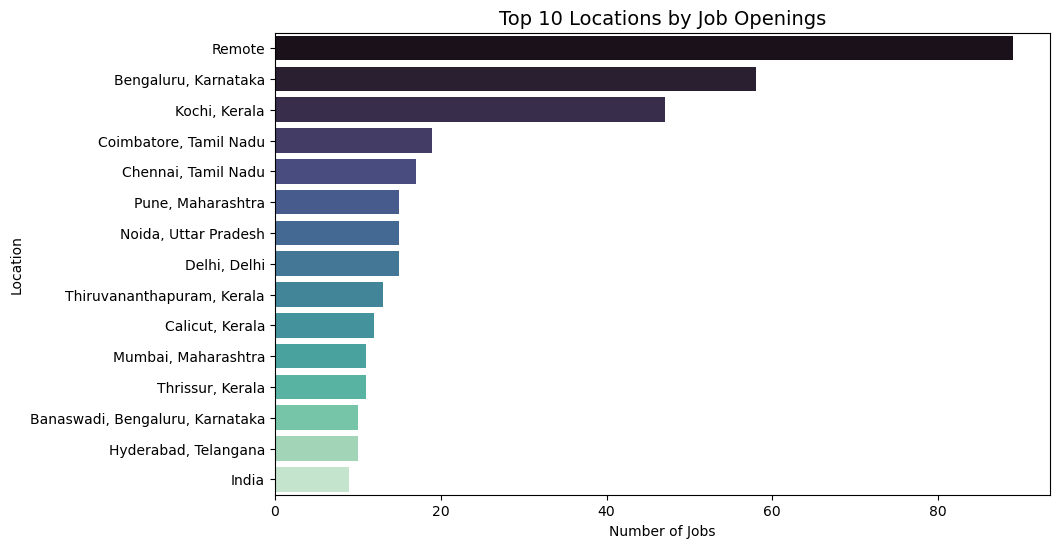

In [13]:
query = """
SELECT location, COUNT(*) AS job_count
FROM job_market
GROUP BY location
ORDER BY job_count DESC
LIMIT 15;
"""
loc_df = pd.read_sql(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(x="job_count", y="location", data=loc_df, palette="mako")
plt.title("Top 10 Locations by Job Openings", fontsize=14)
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.show()


### 📊 Jobs available state-wise

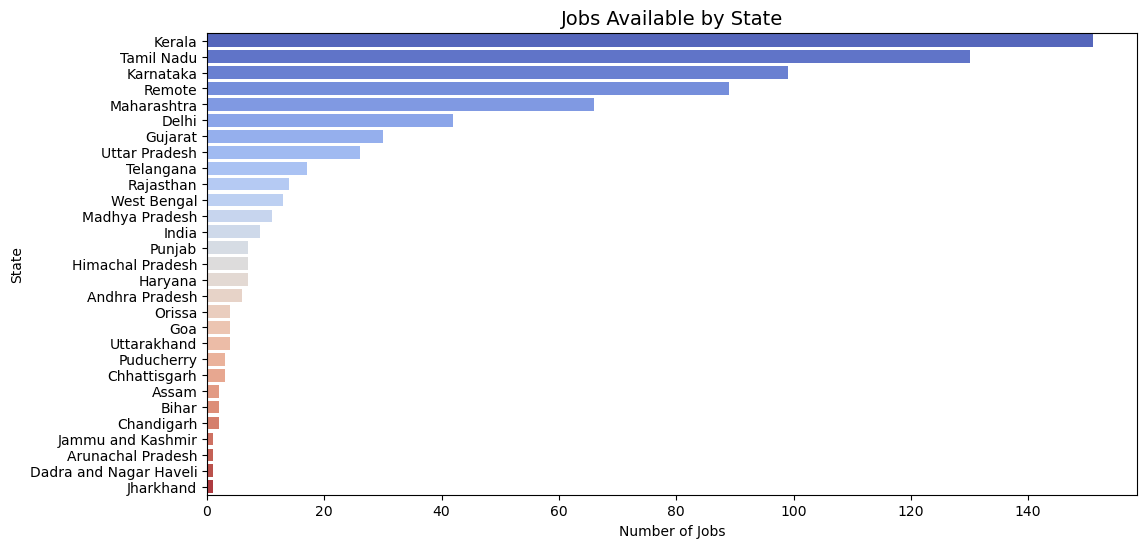

In [16]:

query = """
SELECT state, COUNT(*) AS job_count
FROM job_market
GROUP BY state
ORDER BY job_count DESC;
"""
state_df = pd.read_sql(query, engine)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="job_count", y="state", data=state_df, palette="coolwarm")
plt.title("Jobs Available by State", fontsize=14)
plt.xlabel("Number of Jobs")
plt.ylabel("State")
plt.show()
